In [2]:
import numpy as np
import seaborn as sns

1. Simulate 20 rollings of a biased dice (i.e., the face with 6 dots is twice more porbable than other outcomes)

In [3]:
# numpy random number from vector with unequal probabilities
dice = np.array([i for i in range(1, 7)])
p = 1./7
probabilities = np.array([p, p, p, p, p, 2*p])

np.random.choice(dice, size = 20, p = probabilities)

array([4, 4, 6, 1, 6, 3, 6, 6, 4, 1, 6, 3, 1, 6, 1, 1, 1, 6, 6, 2])

2. Choose 10 numbers from the set $\{5,6,...,100\}$ without replacement.

In [4]:
set = np.array([i+5 for i in range(0,100-4)])
np.random.choice(set, 10, replace=False)

array([75, 74, 73, 68,  6, 61, 78, 51, 83, 86])

3. Generate 2000 Bernoulli trails with success probability equal p = 0.5 (fair coin tosses).
Compare the number of successes with the expected value.

In [5]:
from scipy.stats import bernoulli
coin_toss = np.array(bernoulli.rvs(0.5, size=2000))
np.sum(coin_toss)

1034

$$EX(X) = \sum_{k=0}^{n} {n \choose k} p^k(1-p)^{n-k} = np $$

4. Generate $10^i$ samples from a normal distribution with parameters $\mu$ = 0 and $\sigma$ = 1. Draw histogram for each $i \in \{0,...,8\}$

In [7]:
from scipy.stats import norm
i = np.array([j for j in range(0, 8)])
samples = [np.array(norm.rvs(size=10**each)) for each in i]


<AxesSubplot:ylabel='Count'>

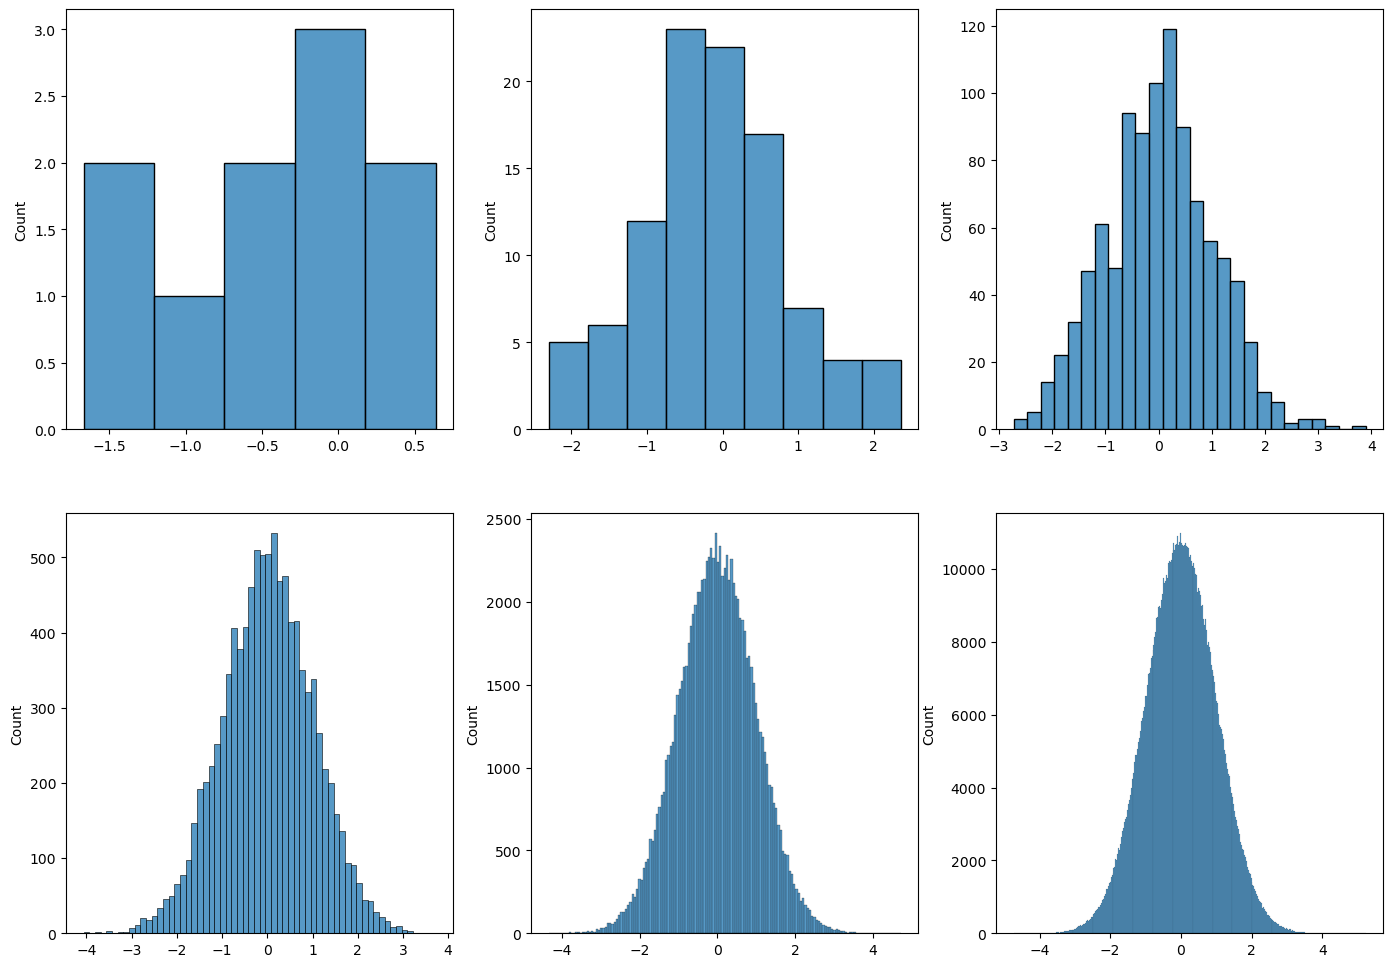

In [8]:
import matplotlib.pyplot as plt 

fig, ax =plt.subplots(2,3)

fig.set_size_inches(17, 12)
sns.histplot(samples[1], ax=ax[0, 0])
sns.histplot(samples[2], ax=ax[0, 1])
sns.histplot(samples[3], ax=ax[0, 2])
sns.histplot(samples[4], ax=ax[1, 0])
sns.histplot(samples[5], ax=ax[1, 1])
sns.histplot(samples[6], ax=ax[1, 2])

5. Generate $2000$ Bernoulli trails with success probability equal $p = 0.15$

In [28]:
def Try(p):
    trials = np.array(bernoulli.rvs(p, size=2000))
    number_of_successes = np.sum(trials)
    max_num = 0
    running_num = 0
    for t in trials:
        if t == 1:
            running_num += 1
        else:
            max_num = running_num if running_num > max_num else max_num
            running_num = 0
    return max_num

In [15]:
p_l = 0.0
p_g = 0.0
T = 10**5
for t in range(0, T):
    coin_toss = np.array(bernoulli.rvs(0.15, size=2000))
    p_l += 1.0/T if np.sum(coin_toss) < 250 else 0.0
    p_g += 1.0/T if np.sum(coin_toss) > 350 else 0.0
print(p_l, p_g)

0.000610000000000001 0.0011000000000000022


$$F(k, n, p) = P(X < k) = \sum_{i = 0}^{k-1} {n \choose i} p^i (1-p)^{n-i}$$

In [10]:
from scipy.stats import binom
from scipy.stats import poisson
print("Prob of getting less than 250 success (binom):", binom.cdf(250, 2000, 0.15))
print("Prob of getting more than 350 success (binom):", 1 - binom.cdf(350, 2000, 0.15))

Prob of getting less than 250 success (binom): 0.0007671115930515741
Prob of getting more than 350 success (binom): 0.0009628199784390556


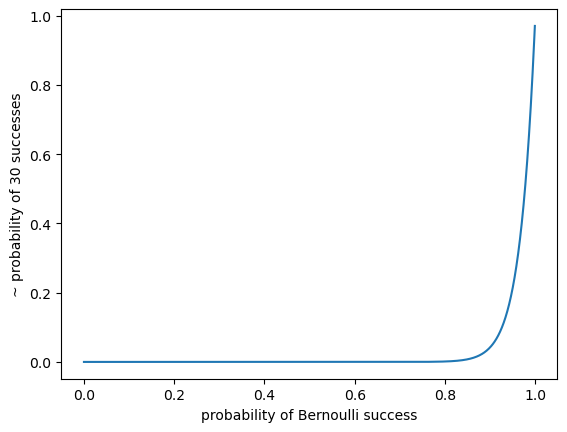

In [29]:
import matplotlib.pyplot as plt 
import numpy as np
x = np.array([i*0.01 for i in range(0, 100)])
y = np.array([p**30 for p in x])
plt.plot(x, y)
plt.xlabel("probability of Bernoulli success")
plt.ylabel("~ probability of 30 successes")
plt.show()

In [ ]:
y1 = np.array([Try(p) for p in x])
plt.plot(x, y)

6. We toss a coin 1000 times. Let X be the number of heads. Find the probability that X
is a number divisible by 11

In [26]:
from scipy.stats import binom

how_many_11_div = 0
P = 0.0
Pt = 0.0
for i in range(1,1001):
    how_many_11_div += 1 if i % 11 == 0 else 0
    P += binom.pmf(i, 1000, 0.5) if i % 11 == 0 else 0
print(P)
print(np.sqrt(binom.var(1000, 0.5))) # = sqrt( np*(1-p) )

0.09090909090909086
15.811388300841896


7. Assume that the height of a male is normally distributed with a mean equal to 177 cm
and a standard deviation equal to 8 cm.

In [13]:
from scipy.stats import norm
mean = 1.77
std = 0.08
print("Prob of being higher than 200cm: ", 1 - norm.cdf(2.0, mean, std))
print("Prob of being between 160cm and 180cm: ", norm.cdf(1.8, mean, std) - norm.cdf(1.6, mean, std))
est = (norm.cdf(1.65, mean, std))**20
print("Prob of drawing 20 random males shorter than 165cm: ", est)

Prob of being higher than 200cm:  0.0020201374899460056
Prob of being between 160cm and 180cm:  0.6293764602242751
Prob of drawing 20 random males shorter than 165cm:  3.1366464366436212e-24


8. Generate a V1: vector with 2000 random natural numbers from the set {50,...,100}.
Generate V2 - a vector such that for every entry in V1, we add an independent random
number from a normal distribution with mean 0 and variance 20. V3 - a vector such
that for every entry in V1, we add an independent random number from a normal
distribution with mean −1 and variance 100. Find the correlations

In [14]:
from scipy.stats import pearsonr

set = np.array([i+50 for i in range(0,51)])
V1 = np.random.choice(set, 2000, replace=True)
V2 = np.array([v + np.random.normal(0, 20) for v in V1])
V3 = np.array([v + np.random.normal(-1, 100) for v in V2])

print("V1 and V1: ", pearsonr(V1, V1)[0])
print("V1 and V2: ", pearsonr(V1, V2)[0])
print("V1 and V3: ", pearsonr(V1, V3)[0])
print("V2 and V3: ", pearsonr(V2, V3)[0])

V1 and V1:  1.0
V1 and V2:  0.5980789923139875
V1 and V3:  0.1535462830935282
V2 and V3:  0.25666691406185904
